In [76]:
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
data = load_iris()
unlabeled_data = data['data']

# Use smarter centroid initialization with K-Means++ logic
centroids = unlabeled_data[np.random.choice(unlabeled_data.shape[0], 3, replace=False)]
cluster_1_centroid, cluster_2_centroid, cluster_3_centroid = centroids


print("Initial Centroids:")
print("Cluster 1 Centroid:", cluster_1_centroid)
print("Cluster 2 Centroid:", cluster_2_centroid)
print("Cluster 3 Centroid:", cluster_3_centroid)

# Function to find new centroids
def new_centroid(unlabeled_data, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid):
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []

    # Assign points to the nearest cluster
    for flower in unlabeled_data:
        dis_1 = np.linalg.norm(flower - cluster_1_centroid)
        dis_2 = np.linalg.norm(flower - cluster_2_centroid)
        dis_3 = np.linalg.norm(flower - cluster_3_centroid)
        group = np.argmin([dis_1, dis_2, dis_3])
        if group == 0:
            cluster_1.append(flower)
        elif group == 1:
            cluster_2.append(flower)
        elif group == 2:
            cluster_3.append(flower)

    # Update centroids
    if len(cluster_1) > 0:
        cluster_1_centroid = np.mean(cluster_1, axis=0)
    else:
        cluster_1_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]

    if len(cluster_2) > 0:
        cluster_2_centroid = np.mean(cluster_2, axis=0)
    else:
        cluster_2_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]

    if len(cluster_3) > 0:
        cluster_3_centroid = np.mean(cluster_3, axis=0)
    else:
        cluster_3_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]


    return cluster_1, cluster_2, cluster_3, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid

# Iterate until convergence or max iterations
max_iterations = 100
tolerance = 1e-4  # Convergence threshold
for iteration in range(max_iterations):
    prev_cluster_1_centroid = cluster_1_centroid.copy()
    prev_cluster_2_centroid = cluster_2_centroid.copy()
    prev_cluster_3_centroid = cluster_3_centroid.copy()

    # Find new clusters and centroids
    cluster_1, cluster_2, cluster_3, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid = \
        new_centroid(unlabeled_data, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid)

    # Check for convergence
    if (
        np.linalg.norm(cluster_1_centroid - prev_cluster_1_centroid) < tolerance and
        np.linalg.norm(cluster_2_centroid - prev_cluster_2_centroid) < tolerance and
        np.linalg.norm(cluster_3_centroid - prev_cluster_3_centroid) < tolerance
    ):
        print(f"Converged after {iteration + 1} iterations!")
        break

# Print final results
print("Final Centroids:")
print("Cluster 1 Centroid:", cluster_1_centroid)
print("Cluster 2 Centroid:", cluster_2_centroid)
print("Cluster 3 Centroid:", cluster_3_centroid)
print("Number of points in each cluster:")
print(f"Cluster 1: {len(cluster_1)} points")
print(f"Cluster 2: {len(cluster_2)} points")
print(f"Cluster 3: {len(cluster_3)} points")


Initial Centroids:
Cluster 1 Centroid: [6.4 3.1 5.5 1.8]
Cluster 2 Centroid: [6.1 3.  4.9 1.8]
Cluster 3 Centroid: [5.2 3.4 1.4 0.2]
Converged after 3 iterations!
Final Centroids:
Cluster 1 Centroid: [6.85       3.07368421 5.74210526 2.07105263]
Cluster 2 Centroid: [5.9016129  2.7483871  4.39354839 1.43387097]
Cluster 3 Centroid: [5.006 3.428 1.462 0.246]
Number of points in each cluster:
Cluster 1: 38 points
Cluster 2: 62 points
Cluster 3: 50 points


In [79]:
from sklearn.datasets import load_iris
import numpy as np
from collections import Counter

# Load Iris dataset
data = load_iris()
unlabeled_data = data['data']
true_labels = data['target']

# Use smarter centroid initialization with K-Means++ logic
centroids = unlabeled_data[np.random.choice(unlabeled_data.shape[0], 3, replace=False)]
cluster_1_centroid, cluster_2_centroid, cluster_3_centroid = centroids

print("Initial Centroids:")
print("Cluster 1 Centroid:", cluster_1_centroid)
print("Cluster 2 Centroid:", cluster_2_centroid)
print("Cluster 3 Centroid:", cluster_3_centroid)

# Function to find new centroids
def new_centroid(unlabeled_data, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid):
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_1_indices = []
    cluster_2_indices = []
    cluster_3_indices = []

    # Assign points to the nearest cluster
    for i, flower in enumerate(unlabeled_data):
        dis_1 = np.linalg.norm(flower - cluster_1_centroid)
        dis_2 = np.linalg.norm(flower - cluster_2_centroid)
        dis_3 = np.linalg.norm(flower - cluster_3_centroid)
        group = np.argmin([dis_1, dis_2, dis_3])
        if group == 0:
            cluster_1.append(flower)
            cluster_1_indices.append(i)
        elif group == 1:
            cluster_2.append(flower)
            cluster_2_indices.append(i)
        elif group == 2:
            cluster_3.append(flower)
            cluster_3_indices.append(i)

    # Update centroids
    if len(cluster_1) > 0:
        cluster_1_centroid = np.mean(cluster_1, axis=0)
    else:
        cluster_1_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]

    if len(cluster_2) > 0:
        cluster_2_centroid = np.mean(cluster_2, axis=0)
    else:
        cluster_2_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]

    if len(cluster_3) > 0:
        cluster_3_centroid = np.mean(cluster_3, axis=0)
    else:
        cluster_3_centroid = unlabeled_data[np.random.randint(0, len(unlabeled_data))]

    return (
        cluster_1,
        cluster_2,
        cluster_3,
        cluster_1_indices,
        cluster_2_indices,
        cluster_3_indices,
        cluster_1_centroid,
        cluster_2_centroid,
        cluster_3_centroid,
    )

# Iterate until convergence or max iterations
max_iterations = 100
tolerance = 1e-4  # Convergence threshold
for iteration in range(max_iterations):
    prev_cluster_1_centroid = cluster_1_centroid.copy()
    prev_cluster_2_centroid = cluster_2_centroid.copy()
    prev_cluster_3_centroid = cluster_3_centroid.copy()

    # Find new clusters and centroids
    cluster_1, cluster_2, cluster_3, cluster_1_indices, cluster_2_indices, cluster_3_indices, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid = \
        new_centroid(unlabeled_data, cluster_1_centroid, cluster_2_centroid, cluster_3_centroid)

    # Check for convergence
    if (
        np.linalg.norm(cluster_1_centroid - prev_cluster_1_centroid) < tolerance and
        np.linalg.norm(cluster_2_centroid - prev_cluster_2_centroid) < tolerance and
        np.linalg.norm(cluster_3_centroid - prev_cluster_3_centroid) < tolerance
    ):
        print(f"Converged after {iteration + 1} iterations!")
        break

# Print final results
print("Final Centroids:")
print("Cluster 1 Centroid:", cluster_1_centroid)
print("Cluster 2 Centroid:", cluster_2_centroid)
print("Cluster 3 Centroid:", cluster_3_centroid)
print("Number of points in each cluster:")
print(f"Cluster 1: {len(cluster_1)} points")
print(f"Cluster 2: {len(cluster_2)} points")
print(f"Cluster 3: {len(cluster_3)} points")

# Count true labels in each cluster
true_labels_cluster_1 = [true_labels[i] for i in cluster_1_indices]
true_labels_cluster_2 = [true_labels[i] for i in cluster_2_indices]
true_labels_cluster_3 = [true_labels[i] for i in cluster_3_indices]

print("\nTrue Labels Distribution in Each Cluster:")
print("Cluster 1:", Counter(true_labels_cluster_1))
print("Cluster 2:", Counter(true_labels_cluster_2))
print("Cluster 3:", Counter(true_labels_cluster_3))

# Print overall true label counts for reference
print("\nOverall True Label Counts:")
print(Counter(true_labels))


Initial Centroids:
Cluster 1 Centroid: [6.  2.7 5.1 1.6]
Cluster 2 Centroid: [6.4 2.8 5.6 2.2]
Cluster 3 Centroid: [4.5 2.3 1.3 0.3]
Converged after 4 iterations!
Final Centroids:
Cluster 1 Centroid: [5.9016129  2.7483871  4.39354839 1.43387097]
Cluster 2 Centroid: [6.85       3.07368421 5.74210526 2.07105263]
Cluster 3 Centroid: [5.006 3.428 1.462 0.246]
Number of points in each cluster:
Cluster 1: 62 points
Cluster 2: 38 points
Cluster 3: 50 points

True Labels Distribution in Each Cluster:
Cluster 1: Counter({1: 48, 2: 14})
Cluster 2: Counter({2: 36, 1: 2})
Cluster 3: Counter({0: 50})

Overall True Label Counts:
Counter({0: 50, 1: 50, 2: 50})


Silhouette Score: 0.48


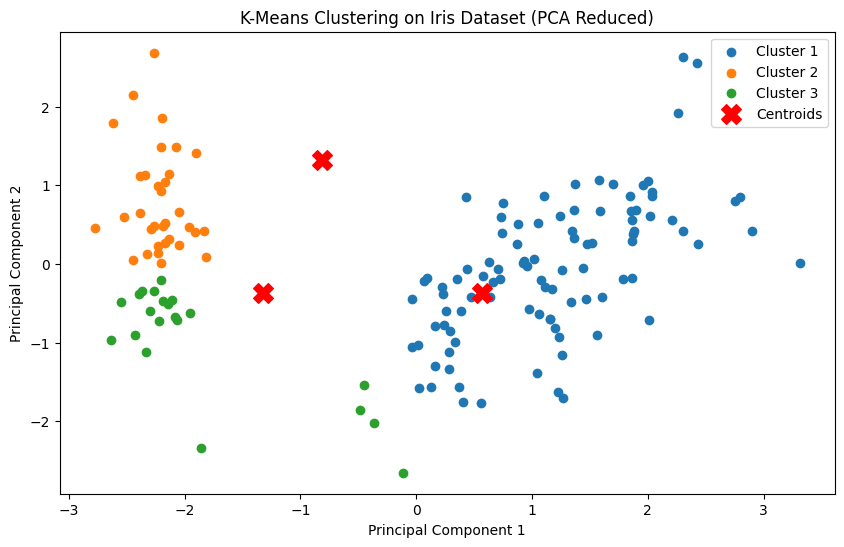


Cluster Composition:
Cluster 1: Counter({2: 50, 1: 46})
Cluster 2: Counter({0: 33})
Cluster 3: Counter({0: 17, 1: 4})

Overall True Label Counts:
Counter({0: 50, 1: 50, 2: 50})


In [81]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
data = load_iris()
unlabeled_data = data['data']
true_labels = data['target']

# Step 1: Standardize the data
scaler = StandardScaler()
unlabeled_data_scaled = scaler.fit_transform(unlabeled_data)

# Step 2: Apply K-Means clustering with K-Means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(unlabeled_data_scaled)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 3: Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(unlabeled_data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Step 4: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
reduced_data = pca.fit_transform(unlabeled_data_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(
        reduced_data[cluster_labels == cluster, 0],
        reduced_data[cluster_labels == cluster, 1],
        label=f'Cluster {cluster + 1}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Step 6: Compare with true labels
from collections import Counter

# Map clusters to true labels
print("\nCluster Composition:")
for cluster in range(3):
    true_labels_in_cluster = [true_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == cluster]
    print(f"Cluster {cluster + 1}: {Counter(true_labels_in_cluster)}")

# Print overall true label distribution for comparison
print("\nOverall True Label Counts:")
print(Counter(true_labels))


In [82]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from collections import Counter

# Load Iris dataset
data = load_iris()
unlabeled_data = data['data']
true_labels = data['target']

# Step 1: Standardize the data
scaler = StandardScaler()
unlabeled_data_scaled = scaler.fit_transform(unlabeled_data)

# Step 2: Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(unlabeled_data_scaled)

# Step 3: Evaluate clustering with Silhouette Score
silhouette_avg = silhouette_score(unlabeled_data_scaled, gmm_labels)
print(f"Silhouette Score (GMM): {silhouette_avg:.2f}")

# Step 4: Analyze true label distribution in each cluster
print("\nCluster Composition:")
for cluster in range(3):
    true_labels_in_cluster = [true_labels[i] for i in range(len(gmm_labels)) if gmm_labels[i] == cluster]
    print(f"Cluster {cluster + 1}: {Counter(true_labels_in_cluster)}")

# Overall true label counts for comparison
print("\nOverall True Label Counts:")
print(Counter(true_labels))


Silhouette Score (GMM): 0.48

Cluster Composition:
Cluster 1: Counter({2: 50, 1: 48})
Cluster 2: Counter({0: 45})
Cluster 3: Counter({0: 5, 1: 2})

Overall True Label Counts:
Counter({0: 50, 1: 50, 2: 50})


In [1]:
# Import necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
import os

# Step 1: Load CIFAR-10 dataset
(x_train, _), _ = cifar10.load_data()

# Step 2: Initialize VGG16 for feature extraction
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Create directory to save features
save_dir = "/content/extracted_features"  # Path for Google Colab
os.makedirs(save_dir, exist_ok=True)

# Step 4: Function to preprocess and extract features in batches
def extract_and_save_features(images, batch_size=500, save_dir=save_dir):
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]

        # Resize images to (224, 224) for VGG16
        batch_resized = np.array([cv2.resize(img, (224, 224)) for img in batch])

        # Normalize images for VGG16
        batch_preprocessed = preprocess_input(batch_resized)

        # Extract features using VGG16
        batch_features = vgg_model.predict(batch_preprocessed)

        # Flatten features
        batch_features = batch_features.reshape(batch_features.shape[0], -1)

        # Save batch features to a .npy file
        file_path = os.path.join(save_dir, f"features_batch_{i // batch_size}.npy")
        np.save(file_path, batch_features)
        print(f"Saved batch {i // batch_size} to {file_path}")

# Step 5: Extract and save features batch-by-batch
extract_and_save_features(x_train, batch_size=1000)

# Step 6: Function to load all saved features from disk
def load_all_features(feature_dir=save_dir):
    # List all .npy files and sort them to maintain batch order
    feature_files = sorted([os.path.join(feature_dir, f) for f in os.listdir(feature_dir) if f.endswith('.npy')])

    # Load and combine features
    features = [np.load(file) for file in feature_files]
    return np.vstack(features)  # Combine all batches

# Step 7: Load combined features
features = load_all_features()
print("Combined features shape:", features.shape)  # (50000, feature_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step
Saved batch 0 to /content/extracted_features/features_batch_0.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
Saved batch 1 to /content/extracted_features/features_batch_1.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step
Saved batch 2 to /content/extracted_features/features_batch_2.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step
Saved batch 3 to /content/extracted_features/features_batch_3.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
Saved batch 4 to /content/extracted_features/features_batch_4.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step
Saved batch 5 to /content/extracted_features/features_batch_5.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
Saved batch 6 to /content/extracted_features/features_batch_6.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
Saved batch 7 to /content/extracted_features/features_batch_7.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
Saved batch 8 to /content/extracted_features/features_batch_8.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/

In [2]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 50 components
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(features)

print("Reduced features shape:", reduced_features.shape)  # (50000, 50)


Reduced features shape: (50000, 50)


In [3]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

print("Cluster labels shape:", cluster_labels.shape)  # (50000,)


Cluster labels shape: (50000,)


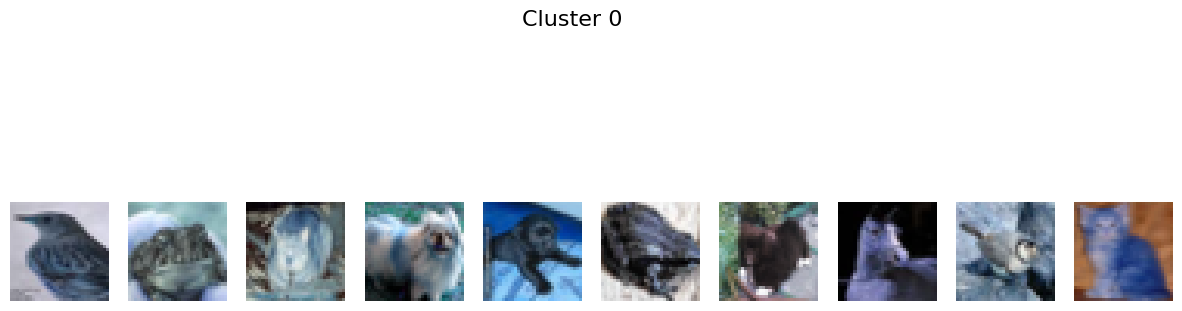

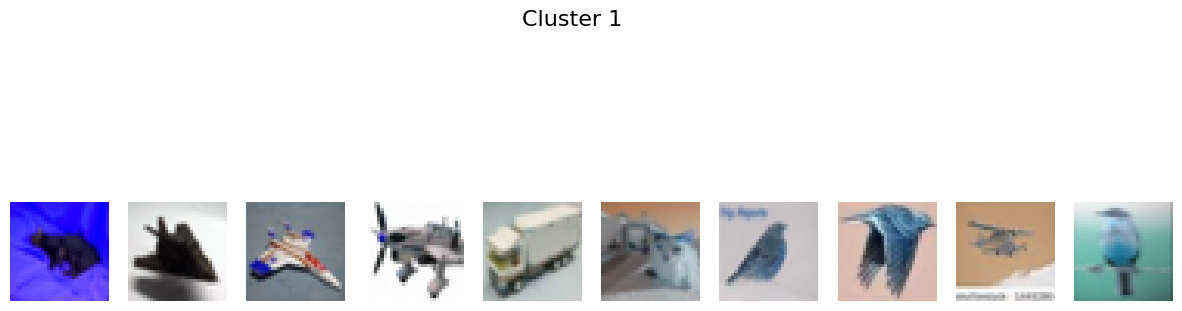

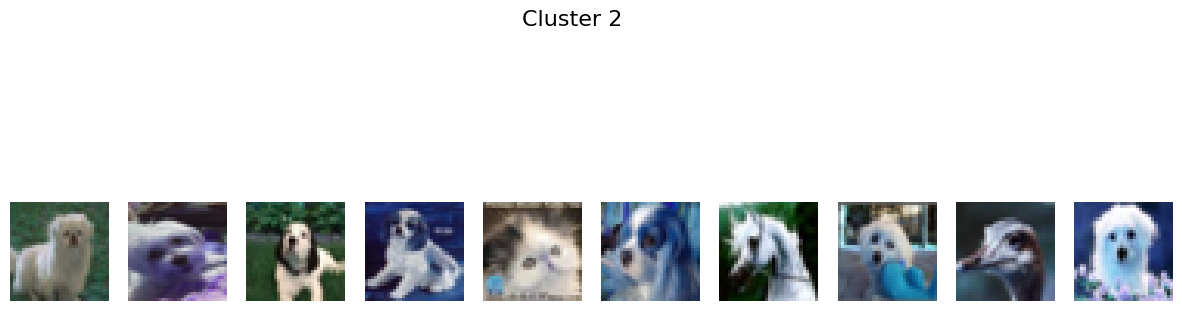

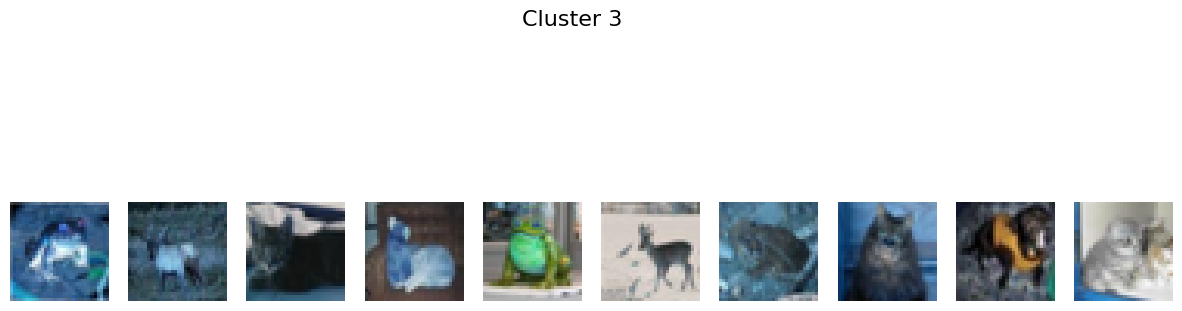

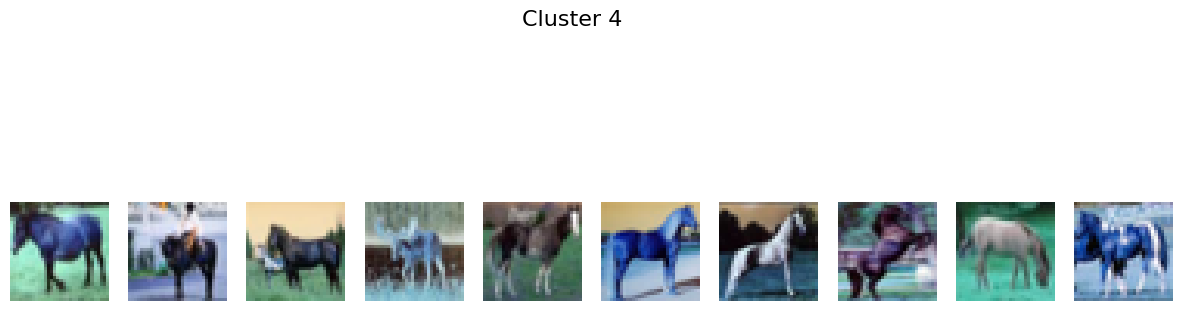

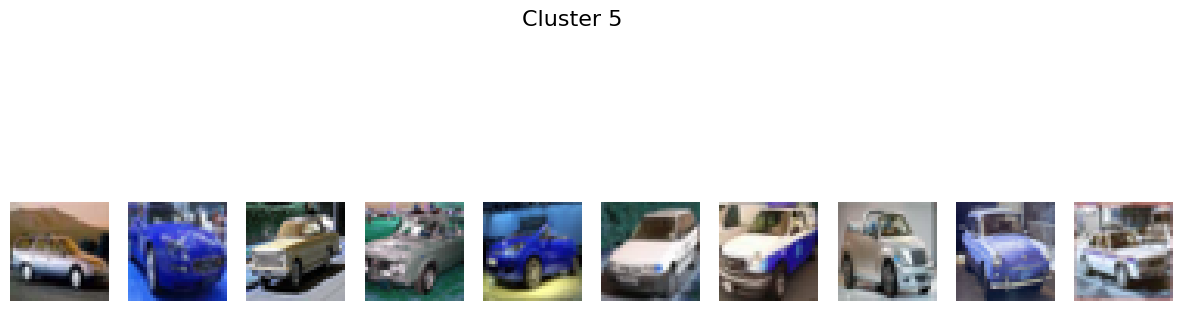

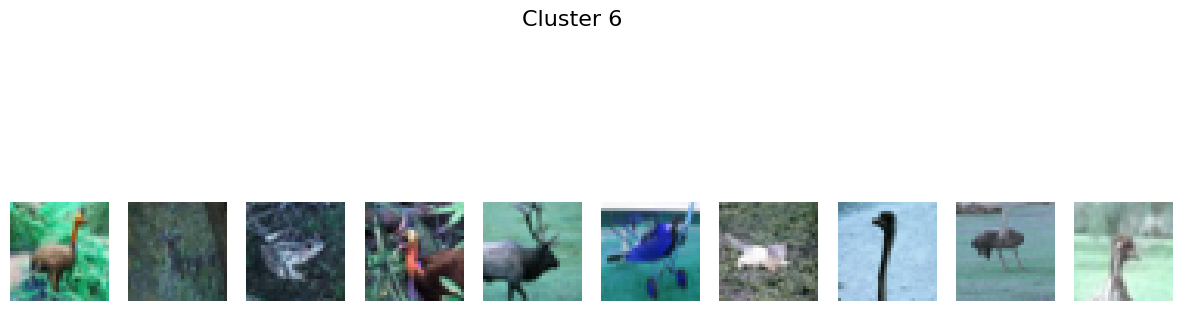

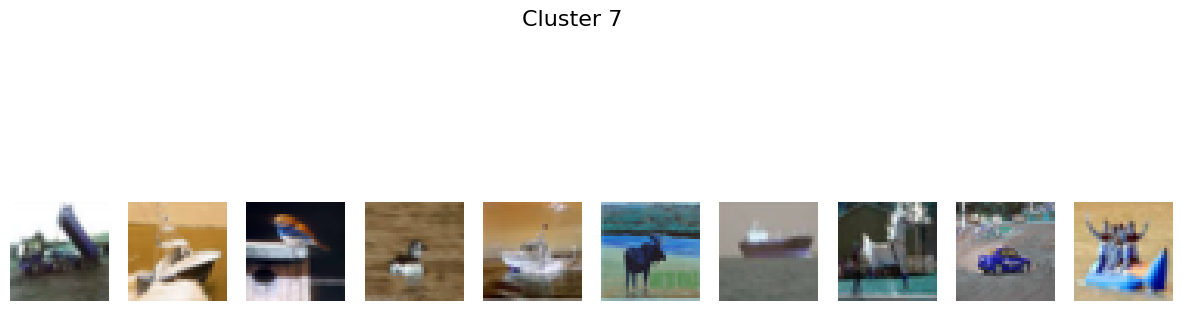

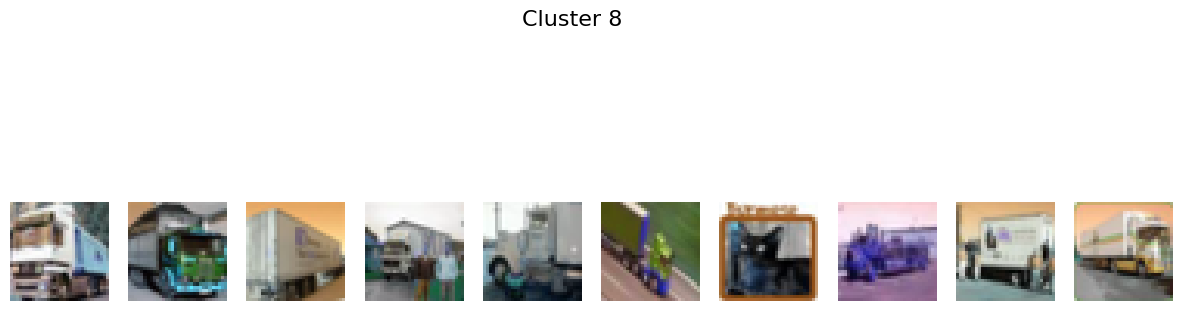

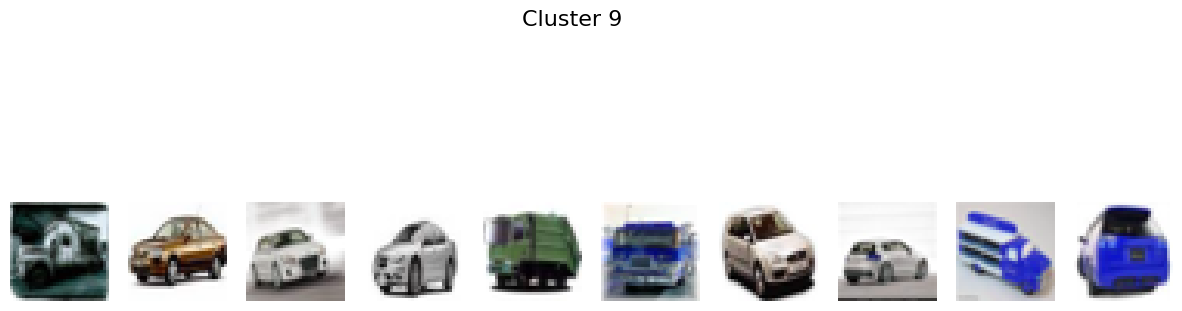

In [9]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Organize images by cluster
clusters = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

# Visualize sample images from each cluster
def display_cluster_images(cluster_id, num_images=10):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(clusters[cluster_id][:num_images]):
        img = x_train[idx]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id}", fontsize=16)
    plt.show()

# Visualize Cluster 0
for i in range(10):
    display_cluster_images(cluster_id=i)
